In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
hout = np.load('Hout_VGG16_train.npy', allow_pickle=True)
hout = [np.array(hout[i], dtype=np.float32) for i in range(len(hout))]

In [30]:
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
gmm = [[] for _ in range(len(hout))]
for i in tqdm(range(len(hout))):
    for j in range(hout[i].shape[1]):
        X = hout[i][:, [j]]
        clf = GaussianMixture(n_components=12, covariance_type='diag', random_state=1)
        clf.fit(X)
        gmm[i].append(clf)

 84%|████████▍ | 84/100 [06:18<01:22,  5.17s/it]c:\Program Files (x86)\python\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
 97%|█████████▋| 97/100 [07:31<00:15,  5.11s/it]c:\Program Files (x86)\python\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
100%|██████████| 100/100 [07:45<00:00,  4.65s/it]


In [31]:
def lp(h, g):
    return g.score_samples(h.reshape(-1, 1))

def uncertainty(h, y):
    llike = np.array([lp(h[:, i], gmm[y][i]) for i in range(len(gmm[0]))])
    return llike.sum(axis=0)

In [32]:
houtt = np.load('Hout_VGG16_test.npy', allow_pickle=True)
houtt = [np.array(houtt[i], dtype=np.float32) for i in range(len(houtt))]

In [33]:
y_ture = np.concatenate([houtt[i][:,-1] for i in range(len(houtt))])
pro = np.concatenate([uncertainty(houtt[i], i) for i in range(len(houtt))])

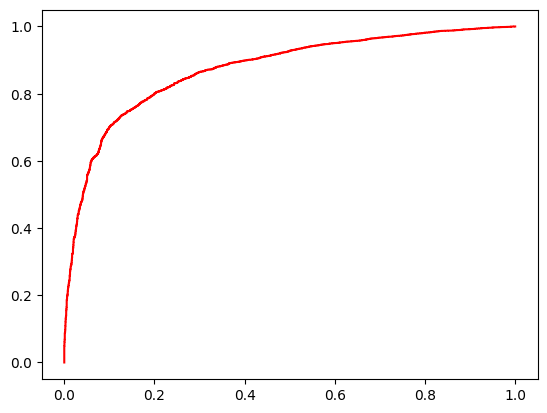

(87.33290606974818, -31170.414736782288)

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_ture, pro)
roc_auc = roc_auc_score(y_ture, pro)
plt.plot(fpr, tpr, color='r', linestyle='-')
plt.show()
roc_auc * 100, thresholds[np.argmax(tpr - fpr)]